In [1]:
#Good IDea for the future
#Let's plot a heatmap of taxi pickups in San Francisco:



import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import scipy.stats as stats

import scipy

import time
from sklearn.decomposition import PCA
from sklearn import decomposition


from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, cross_validation

from matplotlib.colors import ListedColormap

import statsmodels.api as sm
from sklearn import linear_model

from matplotlib import style 
style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression



/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.DataFrame.from_csv("/Users/raphaelpresberg/Desktop/Stevens/BIA 652 Multivariate Data Analysis/NYC_Taxis/NYC_taxis.csv")


#data understanding
data.head()
data.tail(10)
sLength = len(data['Pickup Time'])
data['Trip time'] = pd.Series(np.random.randn(sLength), index = data.index)
data['new_col'] = range(0, sLength)
data = data.reset_index()
data['new_col'] = data.index
print(data.head())
data.info()
data.describe()



  Pickup Date  Pickup Time  Dropoff Date Dropoff Time Vendor ID  \
0  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
1  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
2  2015-01-01  0:00:00.000      20150101  0:11:26.000       CMT   
3  2015-01-01  0:00:01.000      20150101  0:03:49.000       CMT   
4  2015-01-01  0:00:03.000      20150101  0:10:50.000       VTS   

   Passenger Count  Trip Distance (in miles)  Pickup Longitude  \
0                1                      1.68        -73.991547   
1                3                      1.56        -74.001320   
2                5                      4.00        -73.971436   
3                1                      0.80        -73.860847   
4                1                      1.58        -73.987579   

   Pickup Latitude  Rate Code   ...    Dropoff Latitude  Payment Type  \
0        40.750069          1   ...            0.000000           CSH   
1        40.729057          1   ...           40.71966

,Dropoff Date,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,Dropoff Longitude,Dropoff Latitude,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col
count,7.273100e+05,727310.000000,7.273100e+05,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.00000
mean,2.015010e+07,1.783453,1.959882e+01,-72.425570,39.897802,1.045149,-72.440314,39.907709,12.417926,0.329787,0.497078,1.280769,0.258895,15.081973,0.002949,363654.50000
std,5.124534e-01,1.361950,1.407088e+04,10.585702,5.831541,0.628995,10.535020,5.824130,11.253458,0.344260,0.040088,2.473669,1.307798,13.160194,0.998821,209956.45648
min,2.015010e+07,0.000000,0.000000e+00,-79.732277,0.000000,1.000000,-77.459442,-9.029157,-100.000000,-1.000000,-0.500000,-92.420000,-8.000000,-100.300000,-4.831388,0.00000
25%,2.015010e+07,1.000000,1.090000e+00,-73.991249,40.733257,1.000000,-73.990837,40.732002,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000,-0.670601,181827.25000
50%,2.015010e+07,1.000000,1.830000e+00,-73.981209,40.752293,1.000000,-73.979294,40.752449,9.000000,0.500000,0.500000,0.000000,0.000000,11.150000,0.003252,363654.50000
75%,2.015010e+07,2.000000,3.440000e+00,-73.965103,40.767391,1.000000,-73.959824,40.768417,14.000000,0.500000,0.500000,1.950000,0.000000,16.800000,0.677234,545481.75000
max,2.015012e+07,9.000000,1.200000e+07,0.000000,50.769863,99.000000,85.274025,459.533325,3005.500000,9.000000,0.500000,850.000000,89.750000,3006.350000,4.608342,727309.00000


# Outliers

In [3]:

def basics_info (initial_numpy_array):
    print("Mean: ", np.mean(initial_numpy_array))
    #median cost of a trip without @ without taxes
    print("Median: ", np.median(initial_numpy_array))
    #The numpy.ptp() function returns the range (maximum-minimum) of values along an axis.
    print("Range: ", np.ptp(initial_numpy_array))
    #standard deviation & variance
    print("SD: ", np.std(initial_numpy_array))
    print("Variance: ", np.var(initial_numpy_array))
    plt.plot(initial_numpy_array)
    plt.show() 


#removing outliers and compute the distribution plot

def removeOutliers(x):
    a = np.array(x)
    outlierConstant = 1
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

def prob_plot(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([20, 190, 0, 0.03])
    plt.grid(True)
    plt.show()
    

def prob_plot_trip_distance(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([0, 11, 0, 0.6])
    plt.grid(True)
    plt.show()
    

    



BEFORE
Mean:  15.0819733951
Median:  11.15
Range:  3106.65
SD:  13.1601852748
Variance:  173.190476467


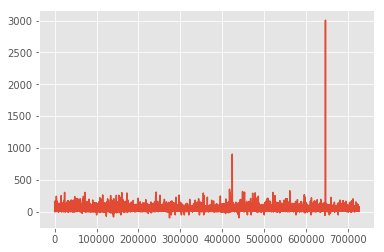

AFTER
Mean:  11.4407643417
Median:  10.3
Range:  25.91
SD:  4.82675778927
Variance:  23.2975907562


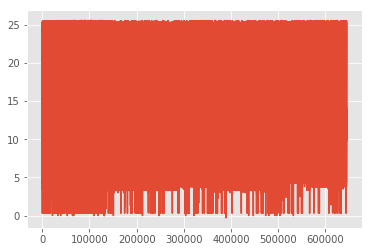

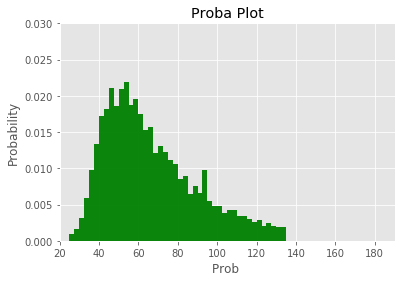

In [4]:
#*******************************************
#STUDY FOR TOTAL AMOUNT 
#*******************************************
total_amount= np.array(data['Total Amount'])

print("BEFORE")
basics_info(total_amount)
#prob_plot(total_amount)
good_total_amount = removeOutliers(total_amount)

print("AFTER")
basics_info(good_total_amount)
prob_plot(good_total_amount)


Mean:  12.4179262625
Median:  9.0
Range:  3105.5
SD:  11.2534498698
Variance:  126.640133973


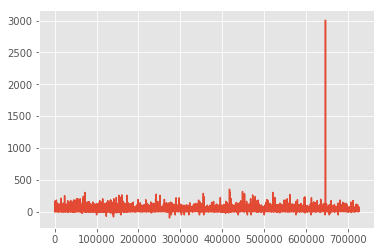

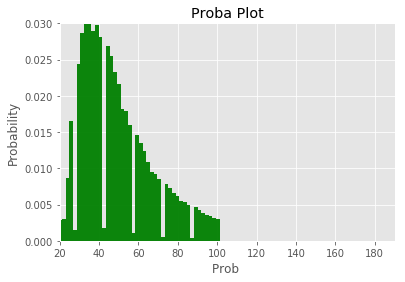

In [5]:
#*******************************************
#STUDY FOR FARE AMOUNT 
#*******************************************
fare_amount = np.array(data['Fare Amount'])


basics_info(fare_amount)
good_fair_amount = removeOutliers(data[['Fare Amount']])
prob_plot(good_fair_amount)


Mean:  1.28076858561
Median:  0.0
Range:  942.42
SD:  2.4736673798
Variance:  6.11903030587


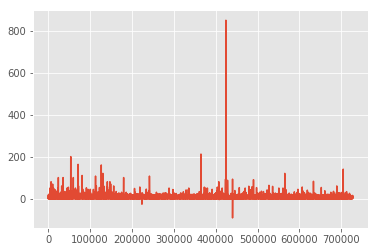

Mean:  0.802575791906
Median:  0.0
Range:  3.9
SD:  1.05124303358
Variance:  1.10511191564


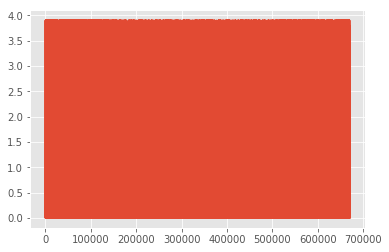

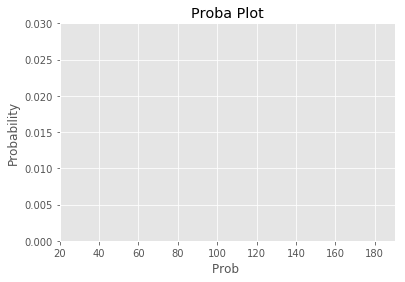

In [6]:
#*******************************************
#STUDY FOR TIP AMOUNT 
#*******************************************
tip_amount = np.array(data['Tip Amount'])



basics_info(tip_amount)
good_tip_amount = removeOutliers(tip_amount)
basics_info(good_tip_amount)

prob_plot(good_tip_amount)


count    727310.000000
mean          1.783453
std           1.361950
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: Passenger Count, dtype: float64
Mean:  1.78345272305
Median:  1.0
Range:  9
SD:  1.3619492225
Variance:  1.85490568468


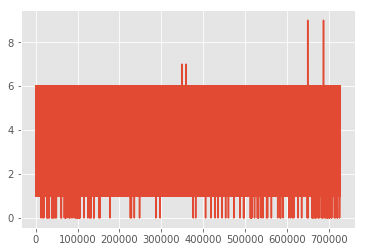

In [7]:
#*******************************************
#STUDY FOR PASSENGER COUNT
#*******************************************

passenger_count = data.as_matrix(columns=data.columns[5:6])



print(data['Passenger Count'].describe())
basics_info(passenger_count)
good_passenger_count = removeOutliers(passenger_count)
#prob_plot_passenger_count(good_passenger_count)



BEFORE
Mean:  19.5988161169
Median:  1.83
Range:  12000000.0
SD:  14070.8739376
Variance:  197989493.369


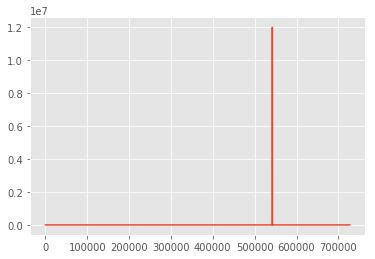

AFTER
Mean:  1.94803034265
Median:  1.6
Range:  5.78
SD:  1.26669997703
Variance:  1.60452883182


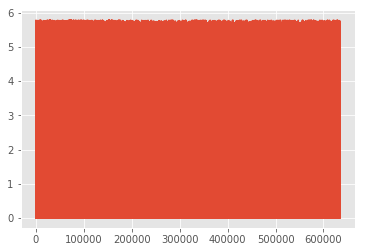

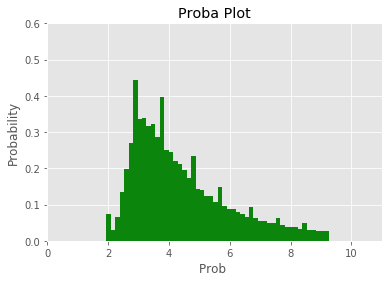

In [58]:
#*******************************************
#STUDY FOR TRIP DISTANCE
#*******************************************

trip_distance = data.as_matrix(columns=data.columns[6:7])

print("BEFORE")
basics_info(trip_distance)
good_trip_distance = removeOutliers(trip_distance)

print("AFTER")
basics_info(good_trip_distance)
prob_plot_trip_distance(good_trip_distance)




In [9]:
# OUTLIERS 2 methods
# ==> IQR
# ==> Z-score
#data = data.iloc[:6000,]
data

#new_data = data.iloc[:10000,]
#new_data


,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Vendor ID,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,...,Dropoff Latitude,Payment Type,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col
0,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,1,1.68,-73.991547,40.750069,1,...,0.000000,CSH,10.0,0.0,0.5,0.00,0.00,10.80,0.019935,0
1,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,3,1.56,-74.001320,40.729057,1,...,40.719662,CRD,7.5,0.5,0.5,0.00,0.00,8.80,-1.802970,1
2,2015-01-01,0:00:00.000,20150101,0:11:26.000,CMT,5,4.00,-73.971436,40.760201,1,...,40.768269,CSH,13.5,0.5,0.5,0.00,0.00,14.50,0.366903,2
3,2015-01-01,0:00:01.000,20150101,0:03:49.000,CMT,1,0.80,-73.860847,40.757294,1,...,40.752285,CSH,5.0,0.5,0.5,0.00,0.00,6.30,0.425778,3
4,2015-01-01,0:00:03.000,20150101,0:10:50.000,VTS,1,1.58,-73.987579,40.765270,1,...,40.776970,CRD,9.0,0.5,0.5,1.90,0.00,12.20,1.019268,4
5,2015-01-01,0:00:03.000,20150101,0:21:48.000,VTS,2,2.57,-73.969017,40.754269,1,...,40.761600,CSH,14.5,0.5,0.5,0.00,0.00,15.80,0.607194,5
6,2015-01-01,0:00:04.000,20150101,0:10:44.000,CMT,3,2.50,-73.957008,40.774502,1,...,40.800617,CSH,10.5,0.5,0.5,0.00,0.00,11.80,-0.745851,6
7,2015-01-01,0:00:05.000,20150101,0:10:52.000,VTS,2,1.30,-73.950500,40.769863,1,...,40.769825,CRD,8.5,0.5,0.5,2.00,0.00,11.80,-0.951541,7
8,2015-01-01,0:00:06.000,20150101,0:00:48.000,CMT,2,0.00,-73.985367,40.710770,1,...,40.710682,NOC,2.5,0.5,0.5,0.00,0.00,3.80,-0.620219,8
9,2015-01-01,0:00:06.000,20150101,0:15:15.000,VTS,3,5.62,-73.978104,40.786282,1,...,40.719971,CSH,18.0,0.5,0.5,0.00,0.00,19.30,0.371103,9


In [10]:
#Remove outliers from tip_amount

data['Outlier'] = abs(data['Tip Amount'] - data['Tip Amount'].mean()) > 1.96*data['Tip Amount'].std()
data['Outlier'].value_counts()

a = data[data.Outlier != True]
a

#remove outliers Total Amount
a['Outlier'] = abs(a['Total Amount'] - a['Total Amount'].mean()) > 1.96*a['Total Amount'].std()
a['Outlier'].value_counts()
    
b = a[a.Outlier != True]
b

#remove outliers Total Amount
b['Outlier'] = abs(b['Trip Distance (in miles)'] - b['Trip Distance (in miles)'].mean()) > 1.96*b['Trip Distance (in miles)'].std()
b['Outlier'].value_counts()
    
c = b[b.Outlier != True]
c

#remove outliers Passenger Count
c['Outlier'] = abs(c['Trip Distance (in miles)'] - c['Trip Distance (in miles)'].mean()) > 1.96*c['Trip Distance (in miles)'].std()
c['Outlier'].value_counts()
    
data_without_outliers = c[c.Outlier != True]

data_without_outliers



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Vendor ID,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,...,Payment Type,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col,Outlier
0,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,1,1.68,-73.991547,40.750069,1,...,CSH,10.0,0.0,0.5,0.00,0.0,10.80,0.019935,0,False
1,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,3,1.56,-74.001320,40.729057,1,...,CRD,7.5,0.5,0.5,0.00,0.0,8.80,-1.802970,1,False
2,2015-01-01,0:00:00.000,20150101,0:11:26.000,CMT,5,4.00,-73.971436,40.760201,1,...,CSH,13.5,0.5,0.5,0.00,0.0,14.50,0.366903,2,False
3,2015-01-01,0:00:01.000,20150101,0:03:49.000,CMT,1,0.80,-73.860847,40.757294,1,...,CSH,5.0,0.5,0.5,0.00,0.0,6.30,0.425778,3,False
4,2015-01-01,0:00:03.000,20150101,0:10:50.000,VTS,1,1.58,-73.987579,40.765270,1,...,CRD,9.0,0.5,0.5,1.90,0.0,12.20,1.019268,4,False
5,2015-01-01,0:00:03.000,20150101,0:21:48.000,VTS,2,2.57,-73.969017,40.754269,1,...,CSH,14.5,0.5,0.5,0.00,0.0,15.80,0.607194,5,False
6,2015-01-01,0:00:04.000,20150101,0:10:44.000,CMT,3,2.50,-73.957008,40.774502,1,...,CSH,10.5,0.5,0.5,0.00,0.0,11.80,-0.745851,6,False
7,2015-01-01,0:00:05.000,20150101,0:10:52.000,VTS,2,1.30,-73.950500,40.769863,1,...,CRD,8.5,0.5,0.5,2.00,0.0,11.80,-0.951541,7,False
8,2015-01-01,0:00:06.000,20150101,0:00:48.000,CMT,2,0.00,-73.985367,40.710770,1,...,NOC,2.5,0.5,0.5,0.00,0.0,3.80,-0.620219,8,False
9,2015-01-01,0:00:06.000,20150101,0:15:15.000,VTS,3,5.62,-73.978104,40.786282,1,...,CSH,18.0,0.5,0.5,0.00,0.0,19.30,0.371103,9,False


In [11]:
data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']].describe()



,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount
count,727310.000000,727310.000000,7.273100e+05,727310.000000,727310.000000
mean,15.081973,1.783453,1.959882e+01,0.329787,1.280769
std,13.160194,1.361950,1.407088e+04,0.344260,2.473669
min,-100.300000,0.000000,0.000000e+00,-1.000000,-92.420000
25%,8.000000,1.000000,1.090000e+00,0.000000,0.000000
50%,11.150000,1.000000,1.830000e+00,0.500000,0.000000
75%,16.800000,2.000000,3.440000e+00,0.500000,1.950000
max,3006.350000,9.000000,1.200000e+07,9.000000,850.000000


In [12]:
data_without_outliers[ ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']].describe()
#data_without_outliers.describe()

,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount
count,638764.000000,638764.000000,638764.000000,638764.000000,638764.000000
mean,11.372894,1.776689,1.994112,0.338608,0.935600
std,4.838188,1.360779,1.323293,0.347733,1.198002
min,-6.800000,0.000000,0.000000,-1.000000,-2.700000
25%,7.800000,1.000000,1.000000,0.000000,0.000000
50%,10.300000,1.000000,1.610000,0.500000,0.000000
75%,14.000000,2.000000,2.700000,0.500000,1.700000
max,34.400000,9.000000,6.120000,9.000000,6.120000


In [13]:
sLength = len(data_without_outliers['Pickup Time'])
data_without_outliers['new_col'] = range(0, sLength)
data_without_outliers = data_without_outliers.reset_index()
data_without_outliers['new_col'] = data_without_outliers.index
data_without_outliers

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Vendor ID,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,...,Payment Type,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col,Outlier
0,0,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,1,1.68,-73.991547,40.750069,...,CSH,10.0,0.0,0.5,0.00,0.0,10.80,0.019935,0,False
1,1,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,3,1.56,-74.001320,40.729057,...,CRD,7.5,0.5,0.5,0.00,0.0,8.80,-1.802970,1,False
2,2,2015-01-01,0:00:00.000,20150101,0:11:26.000,CMT,5,4.00,-73.971436,40.760201,...,CSH,13.5,0.5,0.5,0.00,0.0,14.50,0.366903,2,False
3,3,2015-01-01,0:00:01.000,20150101,0:03:49.000,CMT,1,0.80,-73.860847,40.757294,...,CSH,5.0,0.5,0.5,0.00,0.0,6.30,0.425778,3,False
4,4,2015-01-01,0:00:03.000,20150101,0:10:50.000,VTS,1,1.58,-73.987579,40.765270,...,CRD,9.0,0.5,0.5,1.90,0.0,12.20,1.019268,4,False
5,5,2015-01-01,0:00:03.000,20150101,0:21:48.000,VTS,2,2.57,-73.969017,40.754269,...,CSH,14.5,0.5,0.5,0.00,0.0,15.80,0.607194,5,False
6,6,2015-01-01,0:00:04.000,20150101,0:10:44.000,CMT,3,2.50,-73.957008,40.774502,...,CSH,10.5,0.5,0.5,0.00,0.0,11.80,-0.745851,6,False
7,7,2015-01-01,0:00:05.000,20150101,0:10:52.000,VTS,2,1.30,-73.950500,40.769863,...,CRD,8.5,0.5,0.5,2.00,0.0,11.80,-0.951541,7,False
8,8,2015-01-01,0:00:06.000,20150101,0:00:48.000,CMT,2,0.00,-73.985367,40.710770,...,NOC,2.5,0.5,0.5,0.00,0.0,3.80,-0.620219,8,False
9,9,2015-01-01,0:00:06.000,20150101,0:15:15.000,VTS,3,5.62,-73.978104,40.786282,...,CSH,18.0,0.5,0.5,0.00,0.0,19.30,0.371103,9,False


# Dummy Variables / creation of the good dataset

In [14]:
#*******************************************
#Dummy variable for Vendor ID
#*******************************************

#data = data.iloc[:6000,]
data_without_outliers
#Vendor ID

#0==> VTS (VeriFone)
#1 ==> CMT (creative mobile technology)

i=0
count = 0

a = np.array(data_without_outliers["Vendor ID"])


i=0
for i in range(0,638764) :
    if a[i] =="VTS":
        a[i] = 0
    elif a[i] == "CMT":
        a[i] = 1
    else: 
        count +=1
a



array([0, 0, 1, ..., 1, 0, 1], dtype=object)

In [15]:
#*******************************************
#Dummy variable for Payment Type
#*******************************************

b = np.array(data_without_outliers["Payment Type"])

#Dummy variable is 2 cat or dummy variable trap (log regre slide 28)

#0 ==> CSH
#1 ==> CRD, NOC(1000 rows), DIV (1 row)


count = 0

i=0
for i in range(0,638764) :
    if b[i] =="CSH":
        b[i] = 0
    else: 
        b[i] = 1

b

array([0, 1, 0, ..., 0, 0, 0], dtype=object)

In [16]:
dt_dummy = pd.DataFrame({'Vendor ID Dummy':a, 'Payment Type Dummy':b })
                        #'Fare Amount Dummy': c, 'Tip Amount Dummy' : d, 'Total Amount Dummy' : e, 
                        #'Passenger Count Dummy': f, 'Trip Distance Dummy': g, 'Surcharge Dummy': h})
tip_data = data_without_outliers[ ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']]

        
frames = [dt_dummy, tip_data]

data_dummy = pd.concat(frames, axis=1)
data_dummy

,Payment Type Dummy,Vendor ID Dummy,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount
0,0,0,10.80,1,1.68,0.0,0.00
1,1,0,8.80,3,1.56,0.5,0.00
2,0,1,14.50,5,4.00,0.5,0.00
3,0,1,6.30,1,0.80,0.5,0.00
4,1,0,12.20,1,1.58,0.5,1.90
5,0,0,15.80,2,2.57,0.5,0.00
6,0,1,11.80,3,2.50,0.5,0.00
7,1,0,11.80,2,1.30,0.5,2.00
8,1,1,3.80,2,0.00,0.5,0.00
9,0,0,19.30,3,5.62,0.5,0.00


# PCA on all good data 

In [17]:

from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data_dummy)


#Covariance Matrix for X(features)
mean_vec = np.mean(data_std, axis=0)
cov_mat = (data_std - mean_vec).T.dot((data_std - mean_vec)) / (data_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)


#eigendecomposition on the covariance matrix

#cov_mat = np.cov(data_std.T)
#eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors cov \n%s' %eig_vecs)
#print('Eigenvalues cov \n%s' %eig_vals)

# correlation matrix with eigendecomposition 

cor_mat1 = np.corrcoef(data_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('\n\nEigenvectors corr \n%s' %eig_vecs)
print('Eigenvalues corr \n%s' %eig_vals)




Eigenvectors corr 
[[-0.39971266 -0.65171467  0.09546556  0.58544299  0.2516716   0.01691399
  -0.00399244]
 [-0.00632672 -0.02172259 -0.00592127  0.25337221 -0.66030755 -0.06409891
  -0.70366244]
 [-0.56360742  0.08630371  0.73074074 -0.34731664 -0.14176405  0.0134703
   0.00299602]
 [ 0.00242584 -0.00584686 -0.00561548 -0.28619138  0.64480042  0.0080861
  -0.7086536 ]
 [-0.48353152 -0.30602321 -0.61075064 -0.48812526 -0.20241573  0.14100136
   0.02027169]
 [-0.09512482 -0.03676637 -0.08156078 -0.07453472  0.02506467 -0.98740944
   0.04226441]
 [-0.52884694  0.68724933 -0.27779344  0.38301826  0.15228379  0.0223524
  -0.02114479]]
Eigenvalues corr 
[ 2.46887804  0.17304421  0.05614918  1.32461779  1.21943749  0.99239232
  0.76548098]


In [18]:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.46887803889
1.32461779179
1.21943748657
0.992392319433
0.765480976289
0.17304420602
0.0561491810014


In [19]:
pca=PCA()
pca.fit(data_std)

T = pca.transform(data_std)

data_std.shape
print("initial shape: ", data_std.shape)

T.shape
print("transformed shape: ", T.shape)


print("explaned variance: ", pca.explained_variance_ratio_)
print("compenents: ", pca.components_)

initial shape:  (638764, 7)
transformed shape:  (638764, 7)
explaned variance:  [ 0.35269686  0.18923111  0.17420536  0.14177033  0.10935443  0.0247206
  0.00802131]
compenents:  [[ 0.39971266  0.00632672  0.56360742 -0.00242584  0.48353152  0.09512482
   0.52884694]
 [-0.58544299 -0.25337221  0.34731664  0.28619138  0.48812526  0.07453472
  -0.38301826]
 [ 0.2516716  -0.66030755 -0.14176405  0.64480042 -0.20241573  0.02506467
   0.15228379]
 [-0.01691399  0.06409891 -0.0134703  -0.0080861  -0.14100136  0.98740944
  -0.0223524 ]
 [ 0.00399244  0.70366244 -0.00299602  0.7086536  -0.02027169 -0.04226441
   0.02114479]
 [-0.65171467 -0.02172259  0.08630371 -0.00584686 -0.30602321 -0.03676637
   0.68724933]
 [ 0.09546556 -0.00592127  0.73074074 -0.00561548 -0.61075064 -0.08156078
  -0.27779344]]


In [20]:
components = pd.DataFrame(pca.components_, columns = ['Payment Type Dummy', 'Vendor ID Dummy', 'Total Amount', 'Passenger Count','Trip Distance',
                                                      'Surcharge','Tip Amount' ])

components


,Payment Type Dummy,Vendor ID Dummy,Total Amount,Passenger Count,Trip Distance,Surcharge,Tip Amount
0,0.399713,0.006327,0.563607,-0.002426,0.483532,0.095125,0.528847
1,-0.585443,-0.253372,0.347317,0.286191,0.488125,0.074535,-0.383018
2,0.251672,-0.660308,-0.141764,0.644800,-0.202416,0.025065,0.152284
3,-0.016914,0.064099,-0.013470,-0.008086,-0.141001,0.987409,-0.022352
4,0.003992,0.703662,-0.002996,0.708654,-0.020272,-0.042264,0.021145
5,-0.651715,-0.021723,0.086304,-0.005847,-0.306023,-0.036766,0.687249
6,0.095466,-0.005921,0.730741,-0.005615,-0.610751,-0.081561,-0.277793


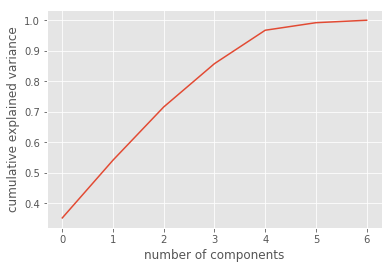

In [21]:

#Choosing number of components 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

In [22]:
pca_data = components.iloc[:5]
pca_data

,Payment Type Dummy,Vendor ID Dummy,Total Amount,Passenger Count,Trip Distance,Surcharge,Tip Amount
0,0.399713,0.006327,0.563607,-0.002426,0.483532,0.095125,0.528847
1,-0.585443,-0.253372,0.347317,0.286191,0.488125,0.074535,-0.383018
2,0.251672,-0.660308,-0.141764,0.644800,-0.202416,0.025065,0.152284
3,-0.016914,0.064099,-0.013470,-0.008086,-0.141001,0.987409,-0.022352
4,0.003992,0.703662,-0.002996,0.708654,-0.020272,-0.042264,0.021145


# Multiple Regression


In [23]:
#Tip Analysis 
#Question: generous/not generous customer

#variable to use ==> total amount, passenger count, trip distance, rate code, surcharge
#Output ==> tip amount

#data = data.iloc[:6000,]

tip_data = data_dummy[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount', 
                       'Payment Type Dummy','Vendor ID Dummy']]
#tip_data
tip_data.describe()
#Creating train and test dataset (2/3 - 1/3)
#msk = np.random.rand(len(tip_data)) < 0.66
#tip_train = tip_data[msk]
#tip_test = tip_data[~msk]
#tip_train = tip_data.iloc[:2000,]
#tip_test = tip_data.iloc[2001:, ]
tip_data

#2 categories to classify ==> Not Generous, Generous

#tip_data.info()
#tip_data.head()
#tip_data.tail()
#tip_test


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount,Payment Type Dummy,Vendor ID Dummy
0,10.80,1,1.68,0.0,0.00,0,0
1,8.80,3,1.56,0.5,0.00,1,0
2,14.50,5,4.00,0.5,0.00,0,1
3,6.30,1,0.80,0.5,0.00,0,1
4,12.20,1,1.58,0.5,1.90,1,0
5,15.80,2,2.57,0.5,0.00,0,0
6,11.80,3,2.50,0.5,0.00,0,1
7,11.80,2,1.30,0.5,2.00,1,0
8,3.80,2,0.00,0.5,0.00,1,1
9,19.30,3,5.62,0.5,0.00,0,0


In [24]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#***************************************************************************************************************
#Multiple Regression 
#***************************************************************************************************************


# WITH STATSMODELS

target = pd.DataFrame(tip_data[['Tip Amount']])

df = pd.DataFrame(tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']])

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']]
y = target["Tip Amount"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

#Analysis: R^2 = 0.535 means this model explain only 53,5% of the variance in our dependent variable


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Tip Amount   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 2.351e+05
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        18:19:15   Log-Likelihood:            -8.8473e+05
No. Observations:              638764   AIC:                         1.769e+06
Df Residuals:                  638760   BIC:                         1.770e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Amount                 0.2290      0.000    499.133      0.000       0.228       0.230
Passenger Count             -0.1242      0.001   -151.977      0.000      -0.126      -0.123
Trip Distance (in miles)    -0.5873      0.002   -291.048      0.000      -0.591      -0.583
Surcharge                   -0.4891      0.004   -134.835      0.000      -0.496      -0.482
==============================================================================
Omnibus:                    27229.188   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33101.240
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                       3.587   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# WITH SCICKIT

#target = tip_data[['Tip Amount']]

#df =tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
#X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = target["Tip Amount"]



#X = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = tip_data["Tip Amount"]

X = data_dummy[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']]
y = data_dummy["Tip Amount"]


X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)



lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X)

accuracy = lm.score(X_test, y_test)


print ('Accuracy: ', accuracy)
print("prediction", predictions)

# percentage of explained variance of the predictions
print("R^2 (percentage of variance): " ,lm.score(X,y))

#coefficients for the predictors
print("coef: ", lm.coef_)

# intercept for the predictors
print("intercept", lm.intercept_)

#Acc was 0.35 with outliers and without dummy variables 

#Modify the mulple regression equation to improve the accuracy


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Accuracy:  0.771635739394
prediction [ 0.23875691  1.33752539  0.00140288 ..., -0.34869313 -0.13223144
  0.06951017]
R^2 (percentage of variance):  0.77000375072
coef:  [ 0.1856751  -0.00421554 -0.36243538 -0.18661753  1.52836629  0.0266691 ]
intercept -1.15342722034


In [26]:
#Test prediction of multiple regression
#X = data_dummy[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']]


test_prediction = np.array([20, 2, 3,  0, 0, 0])
test_prediction = test_prediction.reshape(1, -1)

lm.predict(test_prediction)



array([ 1.46433762])

In [27]:
#With pca_data



X = pca_data[['Payment Type Dummy', 'Vendor ID Dummy', 'Total Amount', 'Passenger Count','Trip Distance', 'Surcharge']]
y = pca_data["Tip Amount"]





X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)


lm = linear_model.LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

#accuracy = lm.score(X_test, y_test)


#print ('Accuracy: ', accuracy)
print("prediction", predictions)

# percentage of explained variance of the predictions
print("R^2 (percentage of variance): " ,lm.score(X,y))

#coefficients for the predictors
print("coef: ", lm.coef_)

# intercept for the predictors
print("intercept", lm.intercept_)





prediction [ 0.52884694 -0.38301826  0.15228379 -0.0223524   0.02114479]
R^2 (percentage of variance):  1.0
coef:  [ 0.83098641  0.03804021  0.17454622 -0.16624818  0.0080231  -0.11474984]
intercept 0.104707786057


In [28]:

#'Payment Type Dummy', 'Vendor ID Dummy', 'Total Amount', 'Passenger Count','Trip Distance',
 #                                                     'Surcharge'


test_prediction = np.array([0, 0, 20,  2, 3, 0])
test_prediction = test_prediction.reshape(1, -1)

lm.predict(test_prediction)



array([ 3.28720509])

# Classification ==> KNN Algo


In [29]:

#***************************************************************************************************************
#Loop to create factors based on a column
#***************************************************************************************************************

#a = tip_data.as_matrix(columns = tip_data.columns[4:5])

#tip_data["Generous ?"] = ""

#i=0
#for i in range(0,6000) :
    
#    if a[i]== 0:
#        tip_data.ix[[i],["Generous ?"]] = "Not Generous"
        
#    else:
#        tip_data.ix[[i],["Generous ?"]] = "Generous"
#tip_data

#dt = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Generous ?']]
#dt

#0 ==> NOT GENEROUS
#1 ==> GENEROUS



In [30]:
#*******************************************
#Dummy variable for Generous or not generous
#*******************************************
a = np.array(tip_data["Tip Amount"])
X = data_dummy[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']]
#0 ==> not generous
#1 ==> generous

i=0
for i in range(0,638764) :
    if a[i] == 0: 
        a[i]= 0
    else:
        a[i] = 1

a_dummy = pd.DataFrame({"Generous ?" : a})

frames = [X, a_dummy]

dt = pd.concat(frames, axis=1)
dt


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Payment Type Dummy,Vendor ID Dummy,Generous ?
0,10.80,1,1.68,0.0,0,0,0.0
1,8.80,3,1.56,0.5,1,0,0.0
2,14.50,5,4.00,0.5,0,1,0.0
3,6.30,1,0.80,0.5,0,1,0.0
4,12.20,1,1.58,0.5,1,0,1.0
5,15.80,2,2.57,0.5,0,0,0.0
6,11.80,3,2.50,0.5,0,1,0.0
7,11.80,2,1.30,0.5,1,0,1.0
8,3.80,2,0.00,0.5,1,1,0.0
9,19.30,3,5.62,0.5,0,0,0.0


In [31]:
#***************************************************************************************************************
#Classification ==> KNN Algo
#***************************************************************************************************************

X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']])
y = np.array(dt['Generous ?'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
accuracy

#Before 0.75 without dummy variables and with outliers

0.97822360335960801

In [32]:
#count how many Generous and not generous 
#dt['Generous ?']

print(dt['Generous ?'].value_counts())


0.0    338494
1.0    300270
Name: Generous ?, dtype: int64


In [33]:
#Test prediction for KNN
#Must use Dummy variables 

example = np.array([9, 1, 2, 0, 0, 0])
example = example.reshape(1, -1)

prediction = clf.predict(example)
prediction

array([ 0.])

#  Several Classes Classification

In [35]:
#Scale of generosity
#0 ==> very bad customer (0)
#1 ==> not generous (< 2)
#2 ==> OK (< 4)
#3 ==> generous (< 8)
#4 ==> very generous (< 10)
#5 ==> Saint (> 10)


In [36]:
#*******************************************
#Dummy variable for Generous or not generous
#*******************************************
a = np.array(tip_data["Tip Amount"])
X = data_dummy[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']]


i=0
for i in range(0,638764) :
    if a[i] == 0: 
        a[i]= 0
    elif a[i]<= 2:
        a[i] = 1
    elif a[i]<= 4:
        a[i] = 2
    elif a[i]<= 8:
        a[i] = 3
    elif a[i]<= 10:
        a[i] = 4
    else: 
        a[i] = 5

a_dummy = pd.DataFrame({"Generous ?" : a})

frames = [X, a_dummy]

dt = pd.concat(frames, axis=1)
#dt


In [37]:
#***************************************************************************************************************
#Classification ==> KNN Algo
#***************************************************************************************************************

X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']])
y = np.array(dt['Generous ?'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
print("KNN accuracy: ", accuracy)



#lm = linear_model.LinearRegression()
#lm.fit(X_train,y_train)
#predictions = lm.predict(X)

#accuracy = lm.score(X_test, y_test)


#print ('Multiple Regression Accuracy: ', accuracy)


logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
accuracy = logisticRegr.score(X_test, y_test)
print('LR accuracy: ', accuracy)
#print(predictions)




KNN accuracy:  0.931884182759
accuracy:  0.869615586327


# Logistic Regression

In [38]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
accuracy = logisticRegr.score(X_test, y_test)
print('accuracy: ', accuracy)
print(predictions)


accuracy:  0.869615586327
[ 0.  0.  1. ...,  0.  1.  0.]


# Neuronal Network


In [42]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,1), random_state=1)
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
print("NN accuracy: ", accuracy)

#hidden_layer_sizes=(5, 2) ==> 0.876
#hidden_layer_sizes=(5, 3) ==> 0.80
#hidden_layer_sizes=(3, 3, 2) ==> 0.878
#hidden_layer_sizes=(8, 5, 2) ==> 0.882
#hidden_layer_sizes=(6, 8, 6) ==> 0.886


NN accuracy:  0.80058393932


In [57]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

#X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Payment Type Dummy','Vendor ID Dummy']])
#y = np.array(dt['Generous ?'])

#6 input variables



model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu'))

model.add(Dense(1, activation='relu'))
#model.add(Dense(1, activation='relu'))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=10)
#model.score(X_test, y_test)
model.evaluate(X_test, y_test)

#print(model.evaluate(X_test, y_test))

#2,1 ==> 0.82
#3,1 ==> 0.85
#5,1 ==> 0.86
#6,1 ==> 0.53
#10,1 ==> 0.855
#11, 1==> 0.53
#12, 1 ==> 0.87
#13,1 ==>0.858
#15, 1 ==> 0.53
#20,1 ==> 
#3,2,1 ==> 0.52
#6,2,1 ==> 0.53
#12,2,1 ==> 0.53
#12, 12, 1 ==> 0.51
# 6, 6, 6, 1 ==> 


Epoch 1/5
511011/511011 [==============================] - 89s 174us/step - loss: 0.7906 - acc: 0.7110
Epoch 2/5
511011/511011 [==============================] - 2113s 4ms/step - loss: -2.4892 - acc: 0.8447
Epoch 3/5
511011/511011 [==============================] - 85s 166us/step - loss: -2.7936 - acc: 0.7985
Epoch 4/5
511011/511011 [==============================] - 104s 204us/step - loss: -2.8311 - acc: 0.8378
Epoch 5/5
127753/127753 [==============================] - 3s 27us/step


[-2.7310932955767133, 0.5840332516667226]